Exploratory Data Analysis of the Welltory COVID-19 and Wearables Dataset

Data Miners; Owais Kamdar and Rajiv Raman

9/24/24


# Data Analysis Report: Health Data Exploration

The dataset used in this project is sourced from the [Welltory COVID-19 and Wearables Open Data](https://github.com/Welltory/hrv-covid19/tree/master). The dataset includes time-series physiological data such as Heart Rate Variability (HRV), sleep patterns, and activity levels collected via wearable devices during the COVID-19 pandemic. We can analyze the data to gain further insight into trends in physiological health indicators during the pandemic.

Data Sampling:
- The dataset was sampled directly from the Welltory repository, and it includes various time-series data collected from multiple users during the COVID-19 pandemic.


### Importing Libraries and Loading Data

We begin by importing essential Python libraries required for data manipulation, visualization, and modeling.


In [2]:
# Install necessary libraries in the Jupyter notebook
!pip3 install pandas==2.2.2 seaborn==0.13.2 matplotlib==3.9.2 scikit-learn==1.5.1

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version

# Getting the version information
print(f"pandas=={pd.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"matplotlib=={plt.matplotlib.__version__}")
print(f"scikit-learn=={sklearn_version}")


pandas==2.2.2
seaborn==0.13.2
matplotlib==3.9.2
scikit-learn==1.5.1


### Exploring Data Structure

To understand the dataset, we first inspect the column names, structure, and descriptive statistics for the key datasets: Participants, Wearables, Heart Rate, and HRV Measurements.

- **Participants Data**: Contains demographic information such as `gender`, `age_range`, and `city`.
- **Wearables Data**: Contains health metrics such as `pulse_average`, `steps_count`, and `active_calories_burned`.
- **Heart Rate Data**: Minute-level data for `heart_rate` and whether the user was resting during the measurement.
- **HRV Measurements Data**: Captures various heart rate variability metrics such as `bpm`, `meanrr`, `sdnn`, and `total_power`.

This step allows us to get an overview of the structure and types of data we are working with.


In [5]:
# Define the directory path for the dataset
data_dir = './hrv-covid19/data'
data_files = os.listdir(data_dir)

# Iterate through several files and load them
for file in data_files:
    # Only load CSV files
    if file.endswith('.csv'):
        # Load the CSV file
        file_path = os.path.join(data_dir, file)
        data = pd.read_csv(file_path)
        
        # Print the file name and basic structure
        print(f"File: {file}")
        print(data.info())  # Inspect data structure
        print(data.head())  # Preview the first few rows
        print("\n" + "="*40 + "\n")  # Separator between files


File: scales_description.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Scale        148 non-null    object
 1   Description  148 non-null    object
 2   Value        148 non-null    int64 
 3   Meaning      148 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.8+ KB
None
              Scale                                       Description  Value  \
0  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      1   
1  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      2   
2  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      3   
3  S_COVID_SYMPTOMS  How long the user has been experiencing symptoms      4   
4     S_COVID_COUGH                       Symptom intensity: Coughing      1   

                           Meaning  
0                 Less than 3 days  
1          

In [6]:
# Load datasets
participants_df = pd.read_csv('./hrv-covid19/data/participants.csv')
wearables_df = pd.read_csv('./hrv-covid19/data/wearables.csv')
heart_rate_df = pd.read_csv('./hrv-covid19/data/heart_rate.csv')
hrv_measurements_df = pd.read_csv('./hrv-covid19/data/hrv_measurements.csv')

# Check column names
print("Participants Columns:", participants_df.columns)
print("Wearables Columns:", wearables_df.columns)
print("Heart Rate Columns:", heart_rate_df.columns)
print("HRV Columns:", hrv_measurements_df.columns)

# Preview the first few rows of each dataset
print("\nParticipants Data (first 5 rows):")
print(participants_df.head())

print("\nWearables Data (first 5 rows):")
print(wearables_df.head())

print("\nHeart Rate Data (first 5 rows):")
print(heart_rate_df.head())

print("\nHRV Measurements Data (first 5 rows):")
print(hrv_measurements_df.head())

# Inspect data structure for each dataset
print("\nParticipants Data Info:")
print(participants_df.info())

print("\nWearables Data Info:")
print(wearables_df.info())

print("\nHeart Rate Data Info:")
print(heart_rate_df.info())

print("\nHRV Measurements Data Info:")
print(hrv_measurements_df.info())


Participants Columns: Index(['user_code', 'gender', 'age_range', 'city', 'country', 'height',
       'weight', 'symptoms_onset'],
      dtype='object')
Wearables Columns: Index(['user_code', 'day', 'resting_pulse', 'pulse_average', 'pulse_min',
       'pulse_max', 'average_spo2_value', 'body_temperature_avg',
       'stand_hours_total', 'steps_count', 'distance', 'steps_speed',
       'total_number_of_flights_climbed', 'active_calories_burned',
       'basal_calories_burned', 'total_calories_burned',
       'average_headphone_exposure', 'average_environment_exposure'],
      dtype='object')
Heart Rate Columns: Index(['user_code', 'datetime', 'heart_rate', 'is_resting'], dtype='object')
HRV Columns: Index(['user_code', 'rr_code', 'measurement_datetime', 'time_of_day', 'bpm',
       'meanrr', 'mxdmn', 'sdnn', 'rmssd', 'pnn50', 'mode', 'amo', 'lf', 'hf',
       'vlf', 'lfhf', 'total_power', 'how_feel', 'how_mood', 'how_sleep',
       'tags', 'rr_data'],
      dtype='object')

Participants

### Descriptive Statistics and Variable Relationships

We compute the descriptive statistics for the key numerical columns in each dataset to understand the dispersion of values. Key metrics analyzed include:

- **Participants Data**: Basic demographic statistics such as height and weight.
- **Wearables Data**: Metrics like `pulse_average` and `steps_count`.
- **Heart Rate Data**: Distribution of heart rate values.
- **HRV Measurements Data**: Metrics related to heart rate variability, including `bpm` and `total_power`.

#### Variable Relationships:
We use a correlation matrix to explore relationships between numerical variables such as `bpm`, `heart_rate`, `meanrr`, `sdnn`, and `rmssd`. The correlation matrix shows the strength of relationships between these variables, with positive correlations indicated by values close to 1 and negative correlations indicated by values close to -1.


In [7]:
# Descriptive statistics for numerical columns
print("\nParticipants Data Descriptive Statistics:")
print(participants_df.describe())

print("\nWearables Data Descriptive Statistics:")
print(wearables_df.describe())

print("\nHeart Rate Data Descriptive Statistics:")
print(heart_rate_df.describe())

print("\nHRV Measurements Data Descriptive Statistics:")
print(hrv_measurements_df.describe())



Participants Data Descriptive Statistics:
           height      weight
count  183.000000  185.000000
mean   169.976393   77.927757
std     12.400103   19.552541
min    132.080000   43.500000
25%    163.500000   63.500000
50%    168.000000   74.344000
75%    174.500000   90.537000
max    250.000000  154.221000

Wearables Data Descriptive Statistics:
       resting_pulse  pulse_average    pulse_min    pulse_max  \
count    1515.000000    2089.000000  2089.000000  2089.000000   
mean       61.409241      78.084251    63.078506    99.456199   
std        12.775324      14.366994    14.334455    29.298930   
min        40.000000      48.000000    10.000000    48.000000   
25%        52.000000      69.000000    53.000000    76.000000   
50%        58.000000      76.000000    60.000000    96.000000   
75%        69.000000      85.000000    72.000000   118.000000   
max       109.000000     163.000000   122.000000   225.000000   

       average_spo2_value  body_temperature_avg  stand_hours_

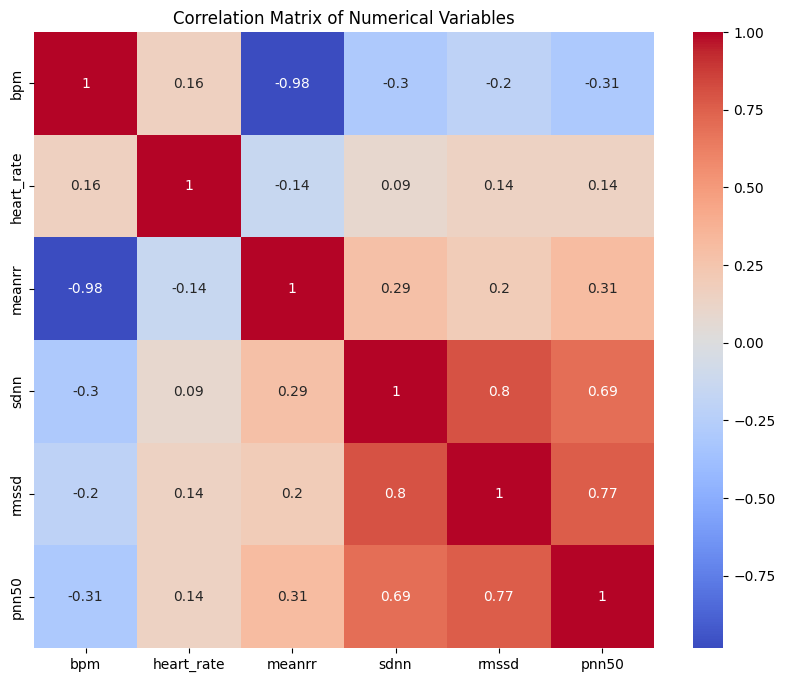

In [8]:
# Merge HRV and Heart Rate data for correlation analysis based on user_code
merged_data = pd.merge(hrv_measurements_df, heart_rate_df, on='user_code', how='inner')

# Select relevant columns for correlation analysis
numerical_columns = ['bpm', 'heart_rate', 'meanrr', 'sdnn', 'rmssd', 'pnn50']

# Calculate the correlation matrix
corr_matrix = merged_data[numerical_columns].corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Key Visualizations for Data Features

Visualizing the data allows us to observe distributions and relationships between various metrics. Below are key visualizations created for important features in the datasets.

### 1. Box Plot for HRV Measurements
We use box plots to explore the distribution of key HRV (Heart Rate Variability) metrics such as `meanrr`, `sdnn`, `rmssd`, and `pnn50`. This helps us understand the central tendency and detect outliers in the HRV data.

### 2. Distribution of Steps Count
We plot the distribution of `steps_count` from the wearables data to observe its range and identify patterns. This visualization also reveals any skewness in the distribution and potential outliers.

### 3. Distribution of Heart Rate
To analyze heart rate data, we plot its distribution. This plot helps us understand how heart rate values vary and whether there are common trends or unusual data points.

### 4. Scatter Plot of Height vs. Weight
This scatter plot visualizes the relationship between participants' `height` and `weight`. It helps identify any correlations or patterns between these two important demographic variables.

### 5. Relationship between BPM and Total Calories Burned
We visualize the relationship between BPM (beats per minute from HRV measurements) and `total_calories_burned` from the wearables data. This scatter plot helps us explore how heart rate intensity correlates with energy expenditure.


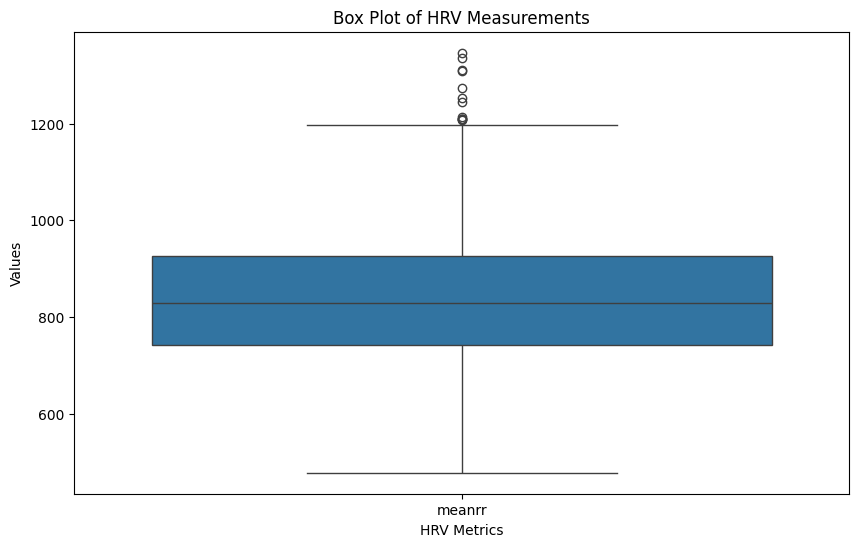

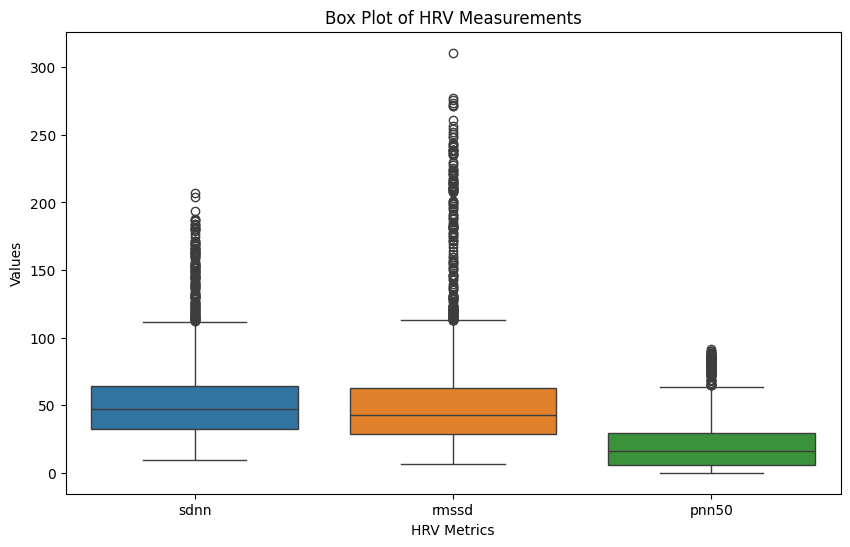

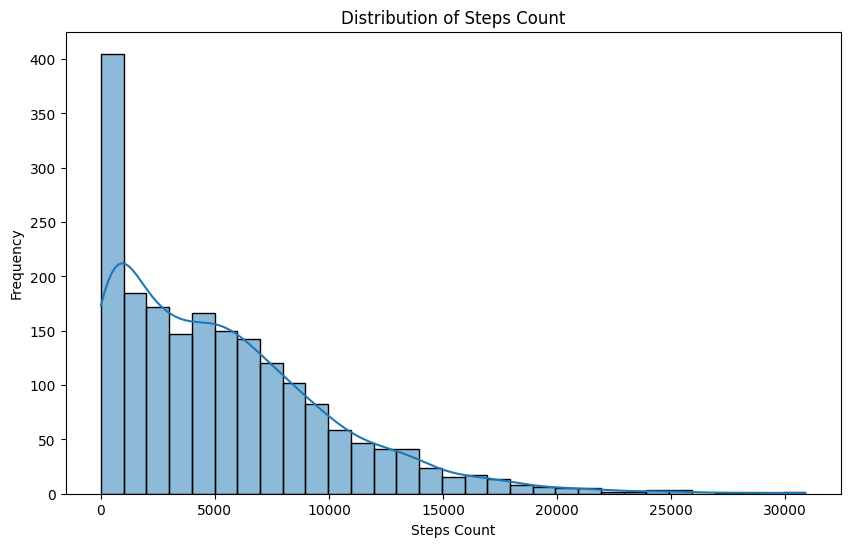

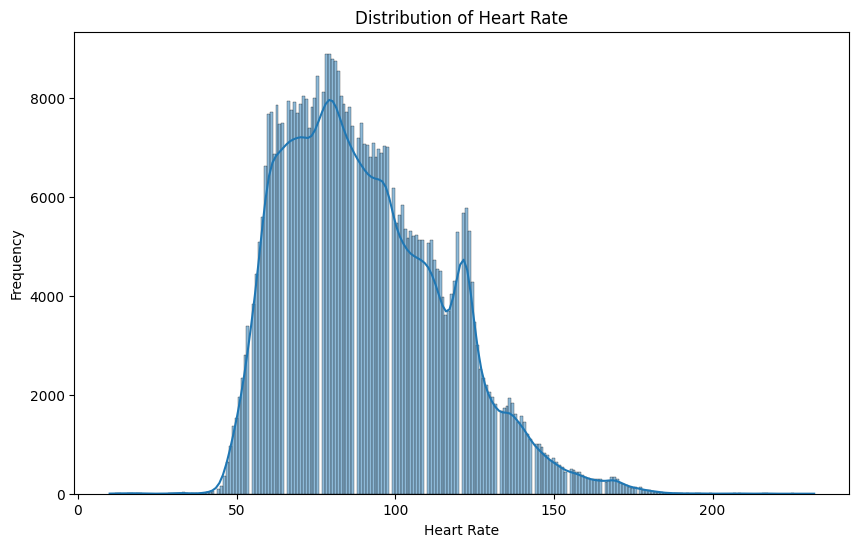

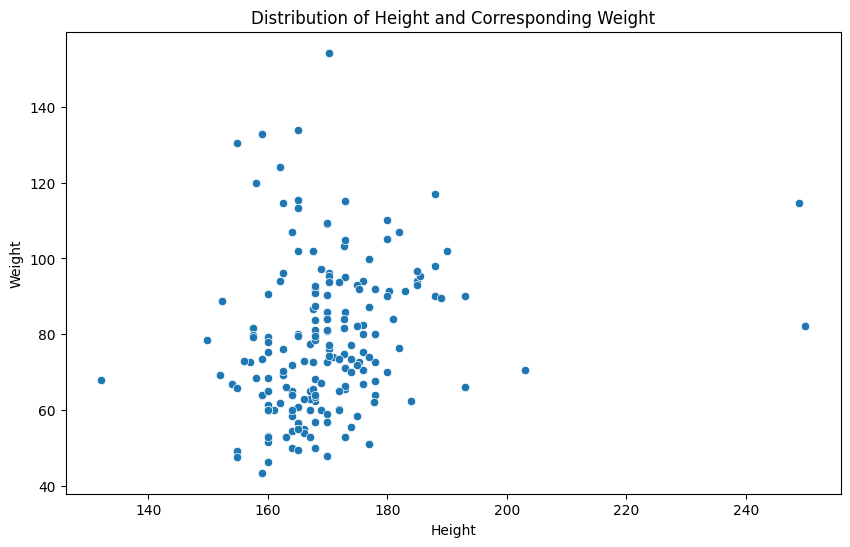

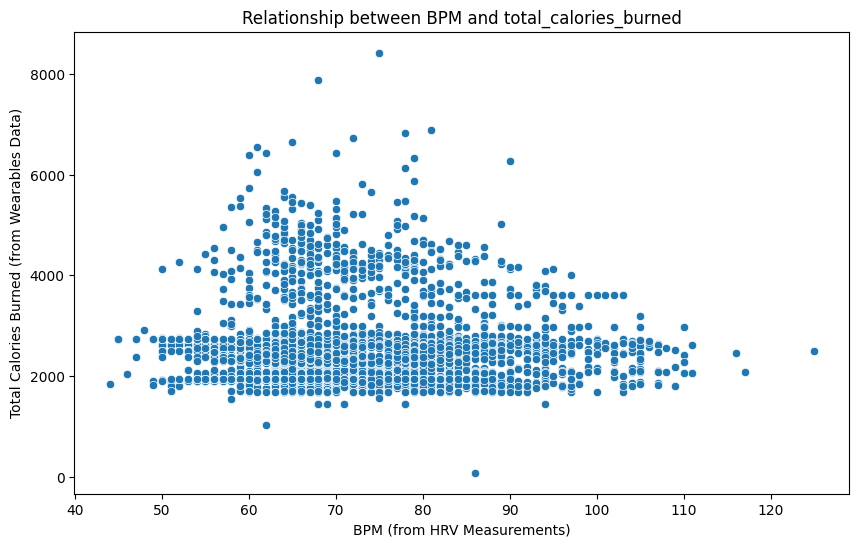

In [9]:
# Key visualizations for the data features

# Box plot for HRV measurements
plt.figure(figsize=(10, 6))
sns.boxplot(data=hrv_measurements_df[['meanrr']])
plt.title('Box Plot of HRV Measurements')
plt.xlabel('HRV Metrics')
plt.ylabel('Values')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=hrv_measurements_df[['sdnn', 'rmssd', 'pnn50']])
plt.title('Box Plot of HRV Measurements')
plt.xlabel('HRV Metrics')
plt.ylabel('Values')
plt.show()

# Distribution of steps count
plt.figure(figsize=(10, 6))
sns.histplot(wearables_df['steps_count'], kde=True)
plt.title('Distribution of Steps Count')
plt.xlabel('Steps Count')
plt.ylabel('Frequency')
plt.show()

# Distribution of heart rate
plt.figure(figsize=(10, 6))
sns.histplot(heart_rate_df['heart_rate'], kde=True)
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

# Distribution of pulse average in wearables data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=participants_df['height'], y=participants_df['weight'])
plt.title('Distribution of Height and Corresponding Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

# Scatter plot to visualize relationship between bpm and heart rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x=hrv_measurements_df['bpm'], y=wearables_df['total_calories_burned'])
plt.title('Relationship between BPM and total_calories_burned')
plt.xlabel('BPM (from HRV Measurements)')
plt.ylabel('Total Calories Burned (from Wearables Data)')
plt.show()




### Combining Datasets for Analysis

We combined four key datasets to enrich the analysis by merging various metrics from different sources:
- **HRV Measurements**: Containing heart rate variability data.
- **Heart Rate**: Capturing minute-level heart rate data.
- **Wearables Data**: Including metrics such as pulse, steps, and calories burned.
- **Participants Data**: Providing demographic information like age, gender, height, and weight.

#### Process:
- We merged the datasets using `user_code` as the common identifier to link data for each individual.
- For time-aligned data (e.g., HRV and heart rate measurements), we used `measurement_datetime` and `datetime` to merge records taken at the same time.

This merging process provided a comprehensive dataset containing physiological metrics, activity levels, and demographic information for each participant, enabling a richer exploration of patterns across multiple dimensions.


In [10]:
# Convert time columns to datetime format
hrv_measurements_df['measurement_datetime'] = pd.to_datetime(hrv_measurements_df['measurement_datetime'])
heart_rate_df['datetime'] = pd.to_datetime(heart_rate_df['datetime'])

# Merge HRV and heart rate data on 'user_code' and time-related columns
combined_df = pd.merge(hrv_measurements_df, heart_rate_df, left_on=['user_code', 'measurement_datetime'], right_on=['user_code', 'datetime'], how='inner')

# Merge with the wearables data on 'user_code'
combined_df = pd.merge(combined_df, wearables_df, on='user_code', how='inner')

# Merge with the participants data on 'user_code'
combined_df = pd.merge(combined_df, participants_df, on='user_code', how='inner')

# Inspect the combined dataset
print("Combined Data with Time and Participants Info:")
print(combined_df.info())
print(combined_df.head())


Combined Data with Time and Participants Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_code                        2674 non-null   object        
 1   rr_code                          2674 non-null   object        
 2   measurement_datetime             2674 non-null   datetime64[ns]
 3   time_of_day                      2674 non-null   object        
 4   bpm                              2674 non-null   int64         
 5   meanrr                           2674 non-null   float64       
 6   mxdmn                            2674 non-null   float64       
 7   sdnn                             2674 non-null   float64       
 8   rmssd                            2674 non-null   float64       
 9   pnn50                            2674 non-null   float64       
 10  mode         

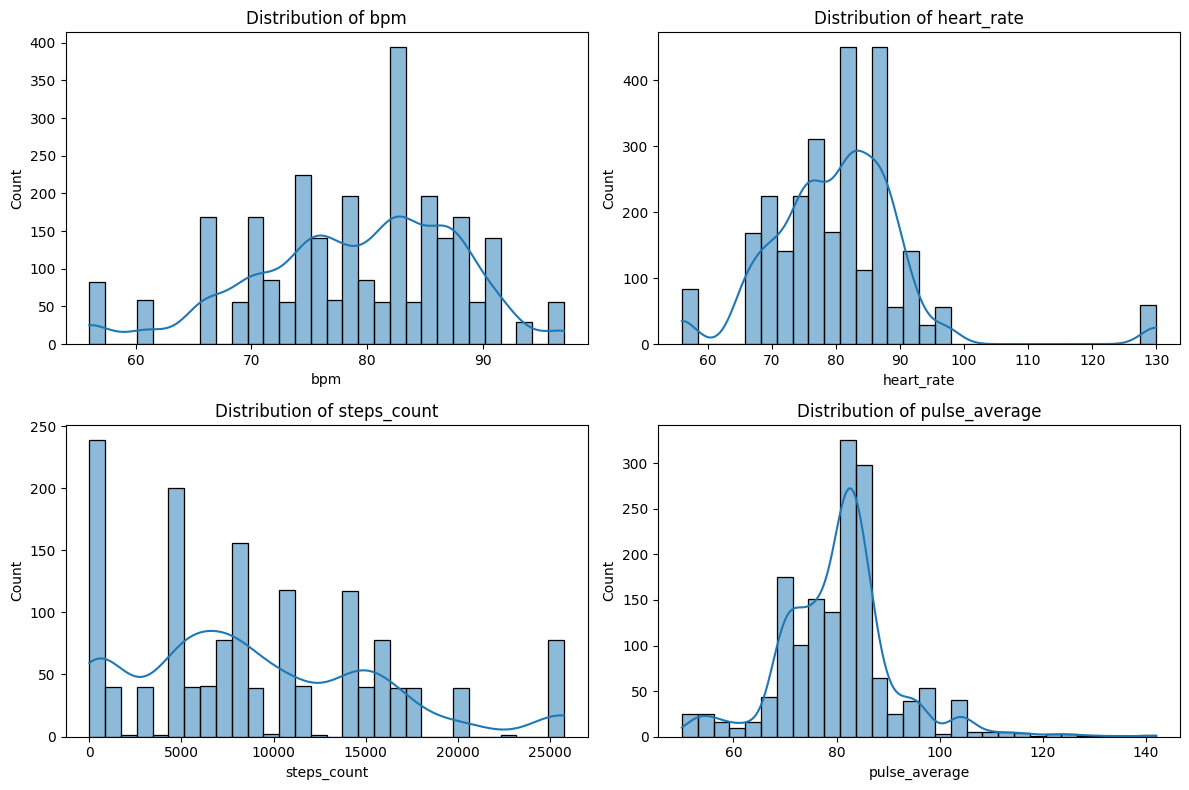

In [11]:
# Histograms for Key Variables
plt.figure(figsize=(12, 8))
variables = ['bpm', 'heart_rate', 'steps_count', 'pulse_average']
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(combined_df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

## Handling Missing Values

In this section, we address the missing data present in both numerical and categorical columns. Missing values in numerical columns can lead to inaccurate analysis, so we handle them by imputing the median value. For categorical columns, missing values are replaced with 'Unknown' to maintain data integrity.

Additionally, we drop columns that contain an excessive number of missing values. Specifically, if a column has more than 1500 missing values, it is dropped from the dataset to prevent potential bias and ensure the quality of the data.

### Steps Taken:
- **Numerical Columns**: For numerical columns such as `pulse_average`, `heart_rate`, and `resting_pulse`, missing values are filled with the column's median. This ensures that outliers or extreme values do not disproportionately affect the imputation.
- **Categorical Columns**: Missing values in categorical columns like `tags` are replaced with 'Unknown'. This preserves the structure of the data without introducing arbitrary categories.
- **Dropping Columns**: Columns with more than 1500 missing values, such as `distance`, `how_sleep`, and `average_spo2_value`, are dropped. These columns contain too much missing data for imputation to be feasible without introducing significant bias.
- **Final Verification**: After handling missing values and dropping unnecessary columns, we verified that all missing values were appropriately addressed, ensuring a cleaner and more reliable dataset for analysis.


In [12]:
print("\nMissing Values in Participants Data:")
print(participants_df.isnull().sum())

print("\nMissing Values in Wearables Data:")
print(wearables_df.isnull().sum())

print("\nMissing Values in Heart Rate Data:")
print(heart_rate_df.isnull().sum())

print("\nMissing Values in HRV Data:")
print(hrv_measurements_df.isnull().sum())


Missing Values in Participants Data:
user_code          0
gender             0
age_range          0
city              12
country            6
height             2
weight             0
symptoms_onset    38
dtype: int64

Missing Values in Wearables Data:
user_code                             0
day                                   0
resting_pulse                      1583
pulse_average                      1009
pulse_min                          1009
pulse_max                          1009
average_spo2_value                 3058
body_temperature_avg               3033
stand_hours_total                  2567
steps_count                        1130
distance                           1229
steps_speed                        1680
total_number_of_flights_climbed    1863
active_calories_burned             1898
basal_calories_burned                 1
total_calories_burned                 1
average_headphone_exposure         2868
average_environment_exposure       2949
dtype: int64

Missing Valu

In [13]:
# Loop through all columns to handle missing values
for column in combined_df.columns:
    # If a column has more than 1500 missing values, drop the column
    if combined_df[column].isnull().sum() > 1500:
        combined_df.drop(columns=[column], inplace=True)
    # Otherwise, if the column is numerical, fill missing values with the median
    elif combined_df[column].dtype in ['float64', 'int64']:
        combined_df[column] = combined_df[column].fillna(combined_df[column].median())
    # For categorical columns, fill with 'Unknown'
    elif combined_df[column].dtype == 'object':
        combined_df[column] = combined_df[column].fillna('Unknown')

# Verify missing values have been handled
print("\nMissing Values After Handling:")
print(combined_df.isnull().sum())



Missing Values After Handling:
user_code                 0
rr_code                   0
measurement_datetime      0
time_of_day               0
bpm                       0
meanrr                    0
mxdmn                     0
sdnn                      0
rmssd                     0
pnn50                     0
mode                      0
amo                       0
lf                        0
hf                        0
vlf                       0
lfhf                      0
total_power               0
how_feel                  0
how_mood                  0
how_sleep                 0
rr_data                   0
datetime                  0
heart_rate                0
is_resting                0
day                       0
pulse_average             0
pulse_min                 0
pulse_max                 0
steps_count               0
distance                  0
active_calories_burned    0
basal_calories_burned     0
total_calories_burned     0
gender                    0
age_range       

### Handling Duplicates and Outliers

We detected for any duplicate rows and dropped if neccessary.

We detected and removed outliers in key numerical columns such as `pulse_average`, `heart_rate`, and `steps_count` using the **Interquartile Range (IQR)** method. Values outside 1.5 times the IQR were considered outliers and removed to ensure they did not skew the analysis.


In [14]:
# Check for duplicates
print(f"Number of duplicate rows: {combined_df.duplicated().sum()}")

# Drop duplicates if found
combined_df.drop_duplicates(inplace=True)

# Verify duplicates are removed
print(f"Number of duplicate rows after removal: {combined_df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [15]:
# Define a function to remove outliers using the IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for important numerical columns
combined_df = remove_outliers(combined_df, 'pulse_average')
combined_df = remove_outliers(combined_df, 'heart_rate')
combined_df = remove_outliers(combined_df, 'steps_count')

# Verify the shape of the dataset after removing outliers
print(f"Dataset shape after outlier removal: {combined_df.shape}")


Dataset shape after outlier removal: (1404, 40)


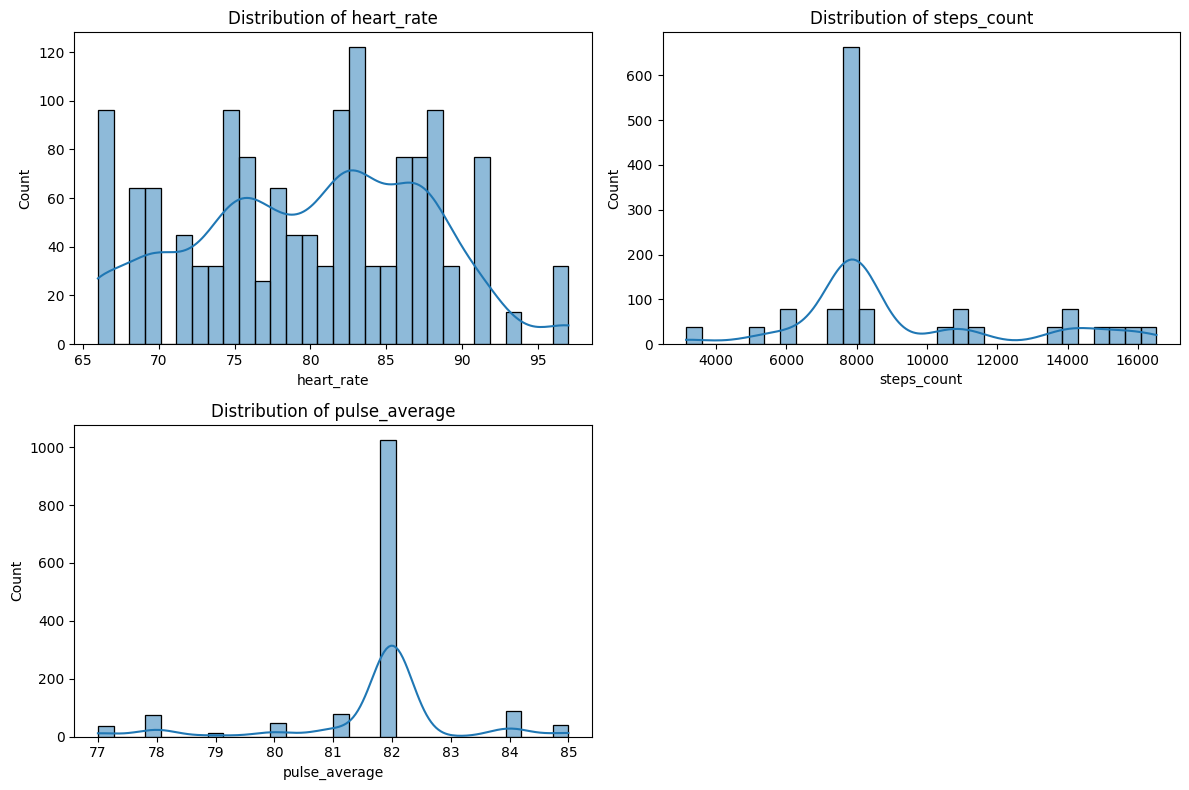

In [16]:
# Histograms for Key Variables to comfirm outlier removal
plt.figure(figsize=(12, 8))
variables = ['heart_rate', 'steps_count', 'pulse_average']
for i, var in enumerate(variables):
    plt.subplot(2, 2, i+1)
    sns.histplot(combined_df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

## Data Transformation - Scaling Numerical Features

To ensure all numerical features have a consistent range and prevent any one feature from dominating the analysis due to scale differences, we applied a scaling transformation to the numerical columns. MinMax scaling was used, which rescales the features to a range of [0, 1]. 

### Steps Taken:
- First, we examined the original values of the selected numerical columns (`pulse_average`, `heart_rate`, `total_power`, and `bpm`) to understand their distributions.
- We applied the `MinMaxScaler` from the `sklearn` library to normalize the values.
- A new DataFrame was created with the scaled versions of these numerical columns, and we optionally concatenated the scaled columns with the original dataset for comparison.
- This step ensures that all numerical columns have the same scale, which is important for algorithms like Principal Component Analysis (PCA) and clustering methods.


In [17]:
# Check original values before scaling
print("\nOriginal Data for numerical columns:")
print(combined_df[['pulse_average', 'heart_rate', 'total_power','bpm']].describe())



Original Data for numerical columns:
       pulse_average   heart_rate  total_power          bpm
count    1404.000000  1404.000000  1404.000000  1404.000000
mean       81.720085    79.994302   703.186610    80.017094
std         1.481411     7.626152   962.685318     7.594667
min        77.000000    66.000000    77.000000    66.000000
25%        82.000000    75.000000   194.000000    75.000000
50%        82.000000    81.000000   388.000000    81.000000
75%        82.000000    86.000000   745.000000    86.000000
max        85.000000    97.000000  4665.000000    97.000000


In [18]:
# Function to check for duplicate columns
def check_duplicate_columns(df):
    duplicate_columns = []
    col_names = df.columns
    for i in range(len(col_names)):
        for j in range(i+1, len(col_names)):
            if df[col_names[i]].equals(df[col_names[j]]):
                duplicate_columns.append(col_names[j])
    return duplicate_columns

# Check for duplicate columns
duplicate_cols = check_duplicate_columns(combined_df)
print(f"Duplicate Columns: {duplicate_cols}")

# Drop duplicate columns if any exist
if len(duplicate_cols) > 0:
    combined_df.drop(columns=duplicate_cols, inplace=True)

# Verify the DataFrame after removing duplicate columns
print(f"Data shape after removing duplicate columns: {combined_df.shape}")


Duplicate Columns: ['datetime']
Data shape after removing duplicate columns: (1404, 39)


In [19]:

# Select numerical columns to scale
numerical_cols = ['pulse_average', 'heart_rate', 'total_power','bpm']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the numerical columns and store the scaled data in a new DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(combined_df[numerical_cols]), 
                         columns=[col + "_scaled" for col in numerical_cols])

# Verify the transformation in the new DataFrame
print("\nScaled Data in a new DataFrame:")
print(scaled_df.head(30))


Scaled Data in a new DataFrame:
    pulse_average_scaled  heart_rate_scaled  total_power_scaled  bpm_scaled
0                  0.125           0.193548            0.263731    0.193548
1                  0.375           0.193548            0.263731    0.193548
2                  0.375           0.193548            0.263731    0.193548
3                  0.000           0.193548            0.263731    0.193548
4                  0.000           0.193548            0.263731    0.193548
5                  0.125           0.193548            0.263731    0.193548
6                  0.375           0.193548            0.263731    0.193548
7                  0.250           0.193548            0.263731    0.193548
8                  0.875           0.193548            0.263731    0.193548
9                  0.125           0.193548            0.263731    0.193548
10                 0.625           0.193548            0.263731    0.193548
11                 0.000           0.193548            

In [20]:
# Concatenate the scaled data with the original DataFrame
combined_df_with_scaled = pd.concat([combined_df, scaled_df], axis=1)

# Verify the concatenation
print("\nCombined Data with Scaled Features:")
print(combined_df_with_scaled.head())


Combined Data with Scaled Features:
     user_code     rr_code measurement_datetime time_of_day   bpm  meanrr  \
84  425969dc69  4170eec589  2020-03-18 21:29:36     evening  72.0   824.7   
86  425969dc69  4170eec589  2020-03-18 21:29:36     evening  72.0   824.7   
87  425969dc69  4170eec589  2020-03-18 21:29:36     evening  72.0   824.7   
89  425969dc69  4170eec589  2020-03-18 21:29:36     evening  72.0   824.7   
91  425969dc69  4170eec589  2020-03-18 21:29:36     evening  72.0   824.7   

    mxdmn    sdnn  rmssd  pnn50  ...  age_range    city         country  \
84   0.14  39.045  42.21  24.24  ...      35-44  London  United Kingdom   
86   0.14  39.045  42.21  24.24  ...      35-44  London  United Kingdom   
87   0.14  39.045  42.21  24.24  ...      35-44  London  United Kingdom   
89   0.14  39.045  42.21  24.24  ...      35-44  London  United Kingdom   
91   0.14  39.045  42.21  24.24  ...      35-44  London  United Kingdom   

    height  weight  symptoms_onset  pulse_average

## Feature Engineering - Creating `Activity Intensity`

In this step, we created a new feature called `activity_intensity` to capture the relationship between a user's heart rate and their physical activity. This feature is calculated by multiplying the `pulse_average` by the `steps_count`, which gives a proxy measure for the overall intensity of a user's activity.

### Steps Taken:
- We calculated the `activity_intensity` as the product of `pulse_average` and `steps_count`.
- We replaced missing values in the `pulse_average` column using the median to ensure no missing data would affect this new feature.
- The new feature was added to the `combined_df_with_scaled` DataFrame.

### Visualizing the `Activity Intensity`:
To better understand the distribution of this new feature, we visualized it using a histogram. This plot shows the frequency of different levels of activity intensity across the dataset. The histogram is accompanied by a Kernel Density Estimate (KDE) curve to highlight the overall distribution trend.


In [21]:
# Fill missing values in 'pulse_average' with the column median to ensure no missing values impact the new feature creation
combined_df_with_scaled['pulse_average'] = combined_df_with_scaled['pulse_average'].fillna(combined_df_with_scaled['pulse_average'].median())

# Create a new feature 'activity_intensity' which is calculated as the product of 'pulse_average' and 'steps_count'.
# This feature will give an indication of the intensity of a user's activity, combining their average pulse with their step count.
combined_df_with_scaled['activity_intensity'] = combined_df_with_scaled['pulse_average'] * combined_df_with_scaled['steps_count']

# Display the first few rows of the DataFrame to verify the newly created 'activity_intensity' feature
print("\nNew Feature (Activity Intensity):")
print(combined_df_with_scaled[['pulse_average', 'steps_count', 'activity_intensity']].head())



New Feature (Activity Intensity):
    pulse_average  steps_count  activity_intensity
84           78.0       7905.0            616590.0
86           80.0       7905.0            632400.0
87           80.0       7905.0            632400.0
89           77.0       7905.0            608685.0
91           77.0       7905.0            608685.0


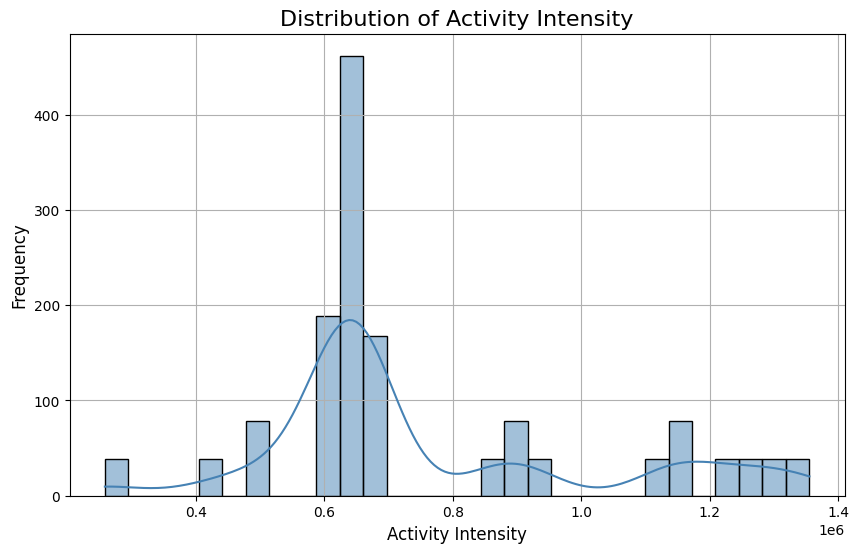

In [22]:

# Visualizing Activity Intensity Distribution
plt.figure(figsize=(10, 6))

# Use seaborn for a cleaner plot style
sns.histplot(combined_df_with_scaled['activity_intensity'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Activity Intensity', fontsize=16)
plt.xlabel('Activity Intensity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()



### Dimensionality Reduction with Principal Component Analysis (PCA)

In this section, we apply **Principal Component Analysis (PCA)** to reduce the number of features in our dataset while retaining as much variance as possible. PCA helps simplify the complexity of high-dimensional data by transforming it into a set of linearly uncorrelated principal components.

#### Process:

1. **Select Numerical Features**: We use the scaled versions of key numerical columns: `'pulse_average_scaled'`, `'heart_rate_scaled'`, `'total_power_scaled'`, and `'bpm_scaled'`.
   
2. **Handle Missing Values**: Any rows containing missing values in the selected columns are removed before applying PCA.

3. **Apply PCA**: PCA is initialized to find the first two principal components, which are linear combinations of the original features that capture the most variance in the data.

4. **Transform Data**: The original dataset is transformed into two new features: **PC1** and **PC2**, which represent the first and second principal components, respectively.

5. **Visualization**: We visualize the data along these two principal components to explore the variance captured by the first two dimensions.

6. **Variance Explained**: We calculate and display the proportion of variance explained by each principal component to understand how much of the total information in the data is preserved.


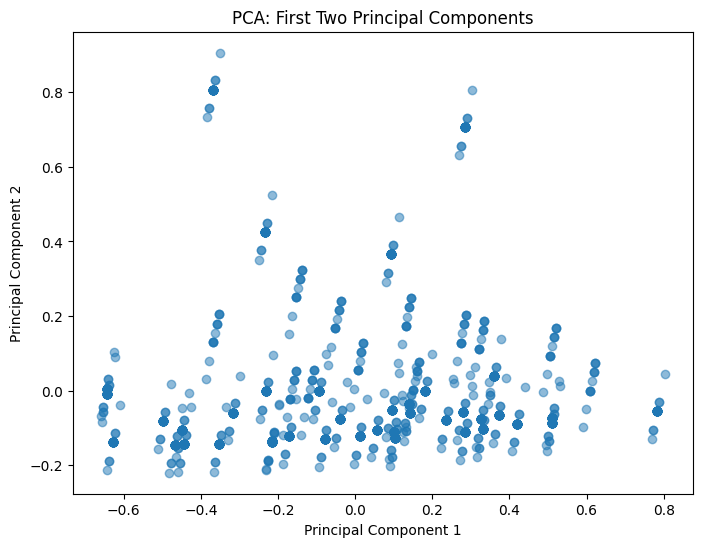

Explained variance by PC1: 0.61
Explained variance by PC2: 0.22
Total variance explained by the first two components: 0.83


In [23]:
# Step 1: Select the numerical columns that were scaled for PCA
numerical_cols = ['pulse_average_scaled', 'heart_rate_scaled', 'total_power_scaled', 'bpm_scaled']

# Step 2: Remove rows with missing values in the selected columns to ensure PCA works properly
pca_data = combined_df_with_scaled[numerical_cols].dropna()

# Step 3: Initialize PCA with 2 components (we will visualize these two components)
pca = PCA(n_components=2)

# Step 4: Fit the PCA model on the scaled data and transform it to obtain the first two principal components
principal_components = pca.fit_transform(pca_data)

# Step 5: Create a new DataFrame to store the principal components (PC1 and PC2)
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'], index=pca_data.index)

# Step 6: Merge the principal components back into the original DataFrame, ensuring the index is maintained for alignment
combined_df_with_scaled = combined_df_with_scaled.join(pca_df, how='left')

# Step 7: Visualize the data in the space of the first two principal components using a scatter plot
plt.figure(figsize=(8,6))
plt.scatter(combined_df_with_scaled['PC1'], combined_df_with_scaled['PC2'], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Step 8: Display the explained variance by the first two principal components, indicating how much of the data's variance is captured by each
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Total variance explained by the first two components: {explained_variance[0] + explained_variance[1]:.2f}")



#### Explained Variance:

- **PC1**: Captures `61%` of the variance in the dataset.
- **PC2**: Captures `22%` of the variance.
- **Total Variance Explained by PC1 and PC2**: `83%`


### Data Quality Assessment

Assessing the quality of data is crucial for ensuring the reliability and accuracy of the analysis and the insights derived from it. In this project, we evaluated several aspects of the dataset to ensure that the data is suitable for our analysis. These aspects include data profiling, data completeness, data accuracy, data consistency, data integrity, and data lineage and provenance.

#### 1. Data Profiling
Data profiling involves understanding the structure, content, and key characteristics of the dataset. The key steps involved in our profiling include:
- **Data structure exploration**: We examined the number of rows and columns, the data types of each column, and any missing values.
- **Summary statistics**: Descriptive statistics (mean, median, mode, standard deviation) were calculated for the numerical columns to get an initial understanding of the data distribution.
- **Key relationships**: Relationships between features (e.g., `pulse_average` and `steps_count`) were explored to identify potential patterns and correlations.

#### 2. Data Completeness
Data completeness refers to the presence of missing or incomplete values in the dataset. In this dataset, we observed several missing values across different columns, especially for:
- **Numerical columns** such as `average_spo2_value` , `body_temperature_avg` , `average_headphone_exposure` and `average_environment_exposure` had a notable number of missing values.
- **Categorical columns** like `tags` were missing in some instances.
To address this, we implemented appropriate strategies, such as filling missing numerical values with the median and categorical values with 'Unknown'. Additionally, columns with excessive missing values were removed to maintain data quality.

#### 3. Data Accuracy
Data accuracy refers to how closely the data values represent the real-world events they are intended to model. For example, **heart rate** and **steps count** should fall within a reasonable range for typical human activity. During profiling, we identified and addressed any outliers or anomalies that might skew the results, ensuring that the data is accurate and reflects plausible values.

#### 4. Data Consistency
Data consistency ensures that the data is uniform across different sources and over time. Since this dataset includes time-series data collected from wearable devices, ensuring consistency in measurements (e.g., `heart_rate`, `steps_count`) over time is critical. We checked for discrepancies in units or mismatches in expected data ranges and standardized the data where necessary.

#### 5. Data Integrity
Data integrity refers to the overall accuracy and consistency of the data, particularly when merging datasets. During the combination of datasets (e.g., **wearables**, **heart rate**, and **HRV measurements**), we ensured that there was no loss of data or incorrect alignment of records. Index-based merging allowed us to maintain the integrity of the combined dataset without introducing duplicate or misaligned entries.

#### 6. Data Lineage and Provenance
Data lineage tracks the origins and transformations of the data, ensuring transparency in where the data comes from and how it has been processed. In this case, the dataset was sourced from the **Welltory COVID-19 and Wearables Open Data** repository. Throughout the analysis, we documented all transformations applied to the dataset, including missing value handling, scaling, and feature creation, ensuring a clear record of data modifications.

#### Conclusion
By addressing these aspects of data quality, we ensured that the dataset used in our analysis is accurate, complete, and consistent. Each step was carefully documented to maintain data lineage and provenance, ultimately supporting the reliability of our results and insights.
